In [3]:

import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [4]:
! ls

Lapidus-Project 2 (2).ipynb new.txt
Lapidus-Project 2.ipynb


In [5]:
KCDF= pd.read_csv('../data/kc_house_data.csv')

In [6]:
KCDF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [7]:
import seaborn as sns

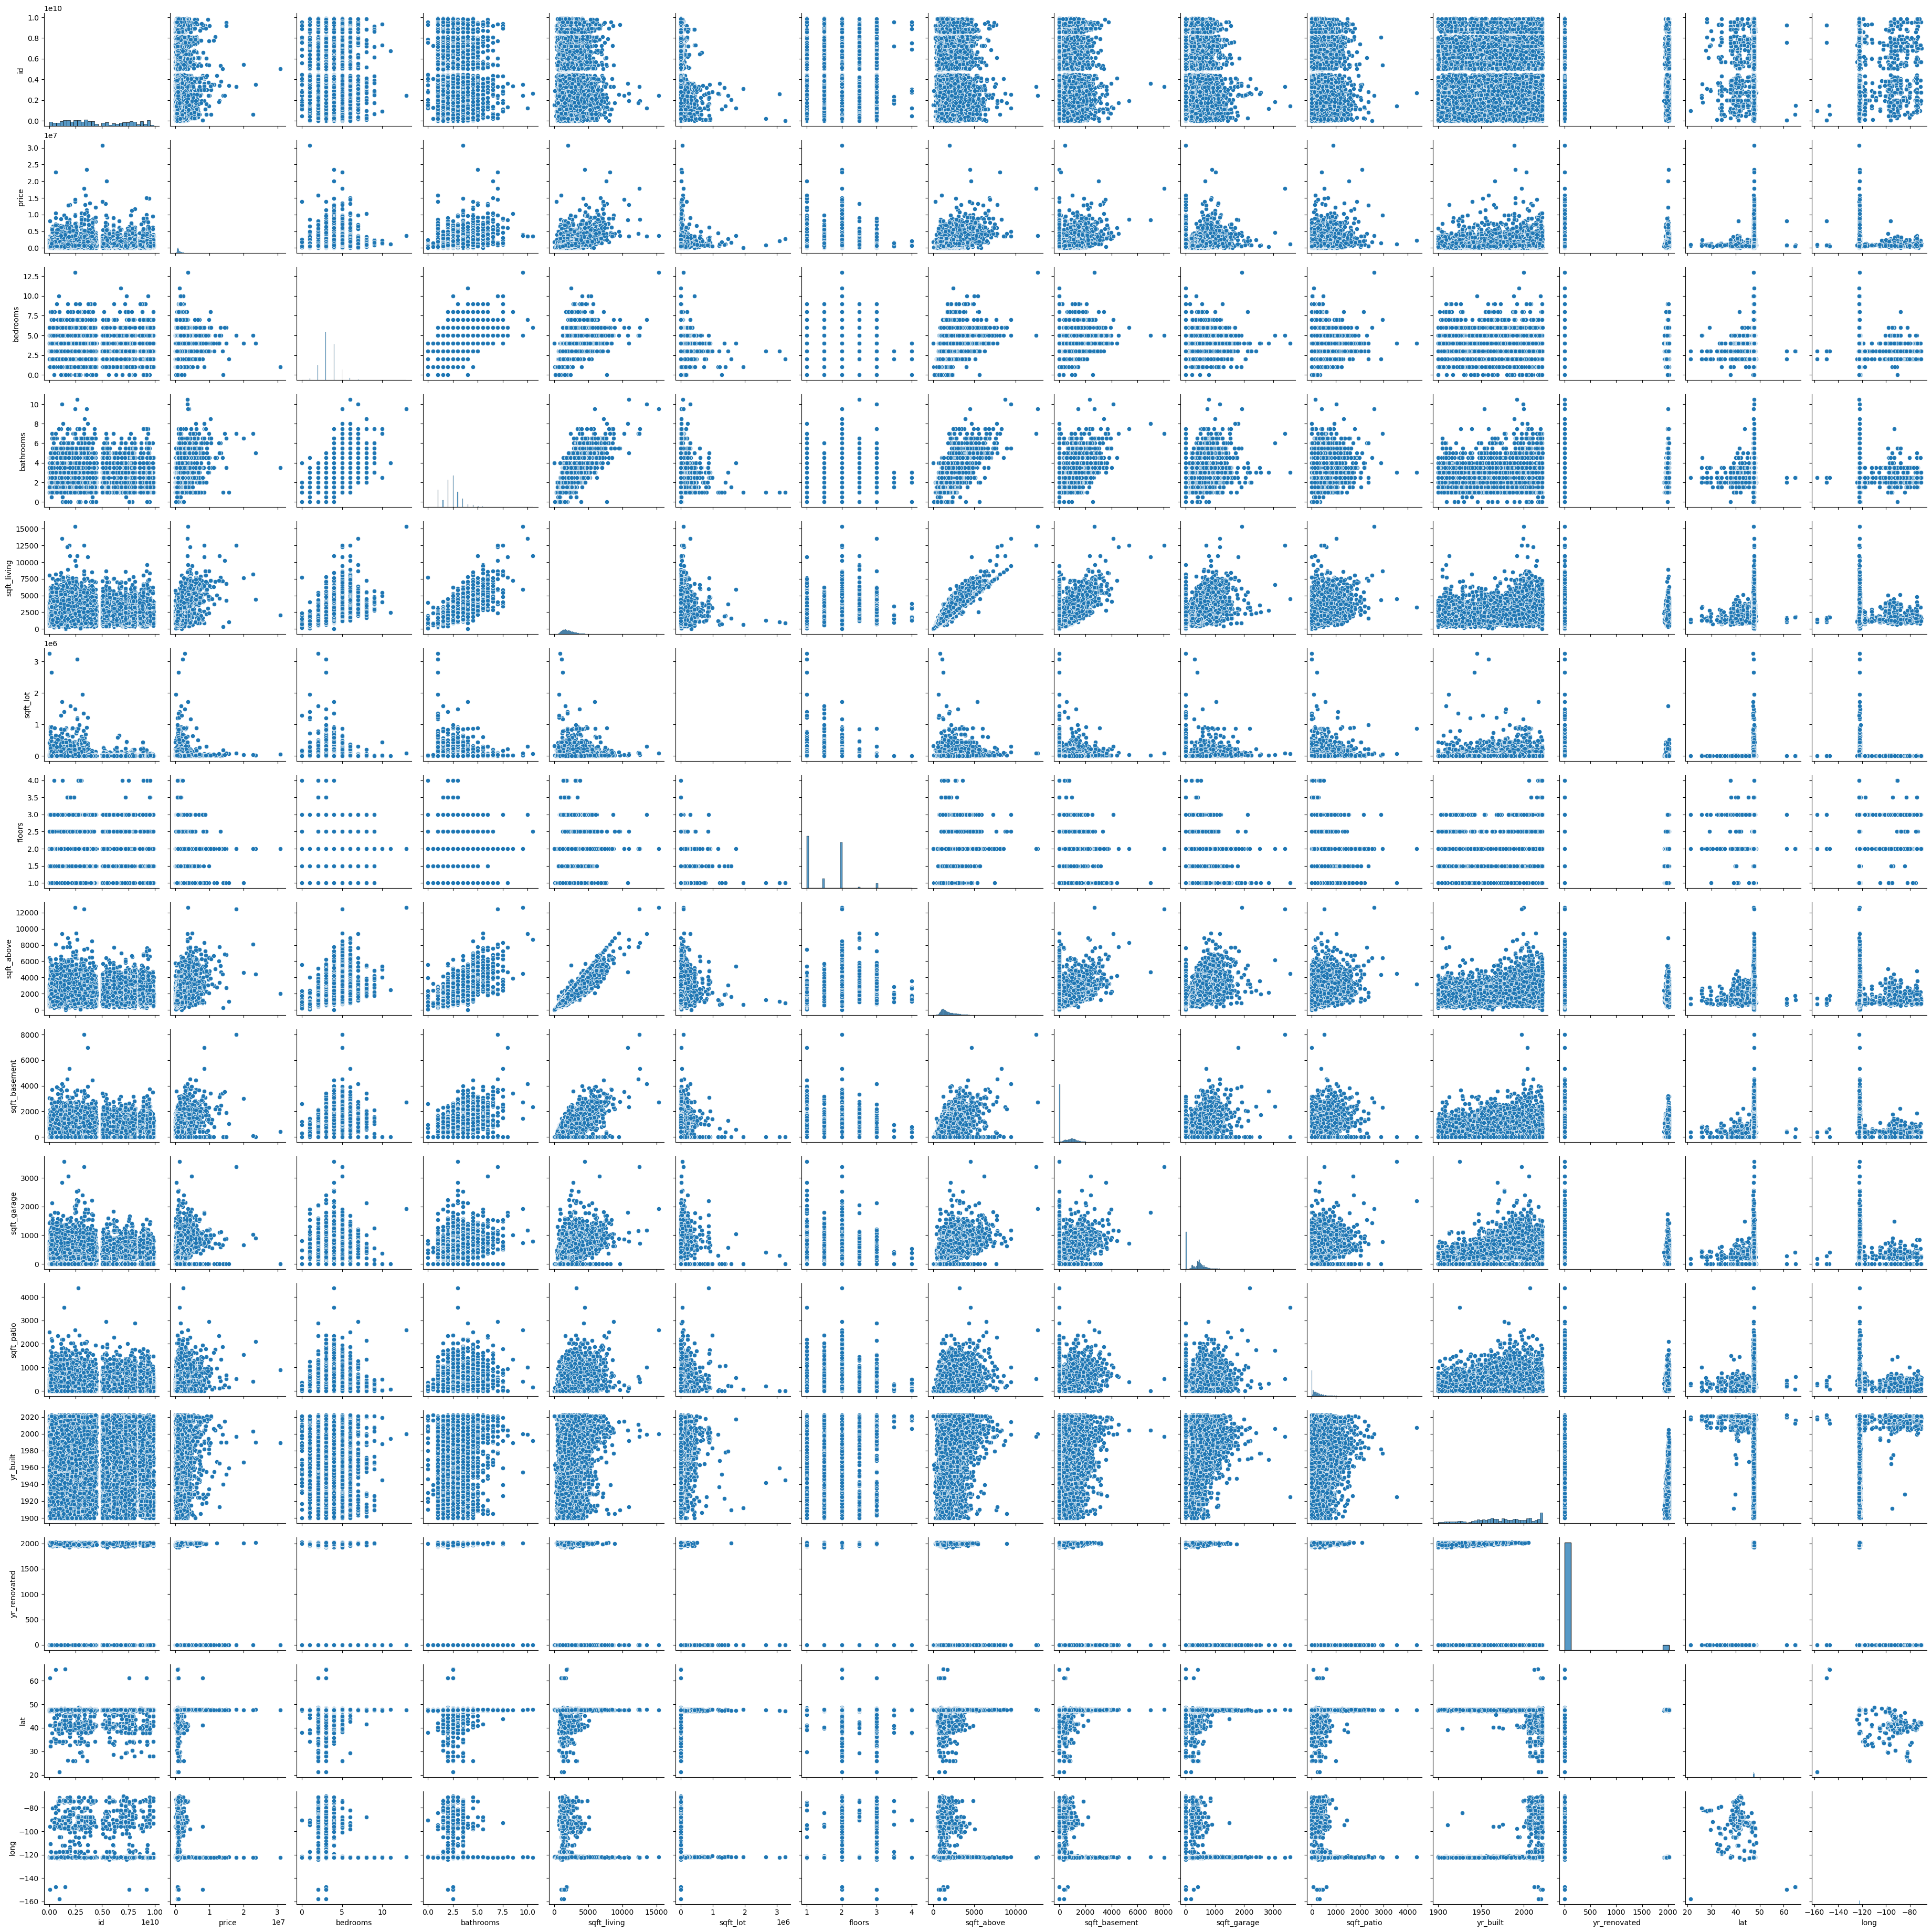

In [8]:
sns.pairplot(KCDF)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/3466250336.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(KCDF.corr().abs(), annot=True)


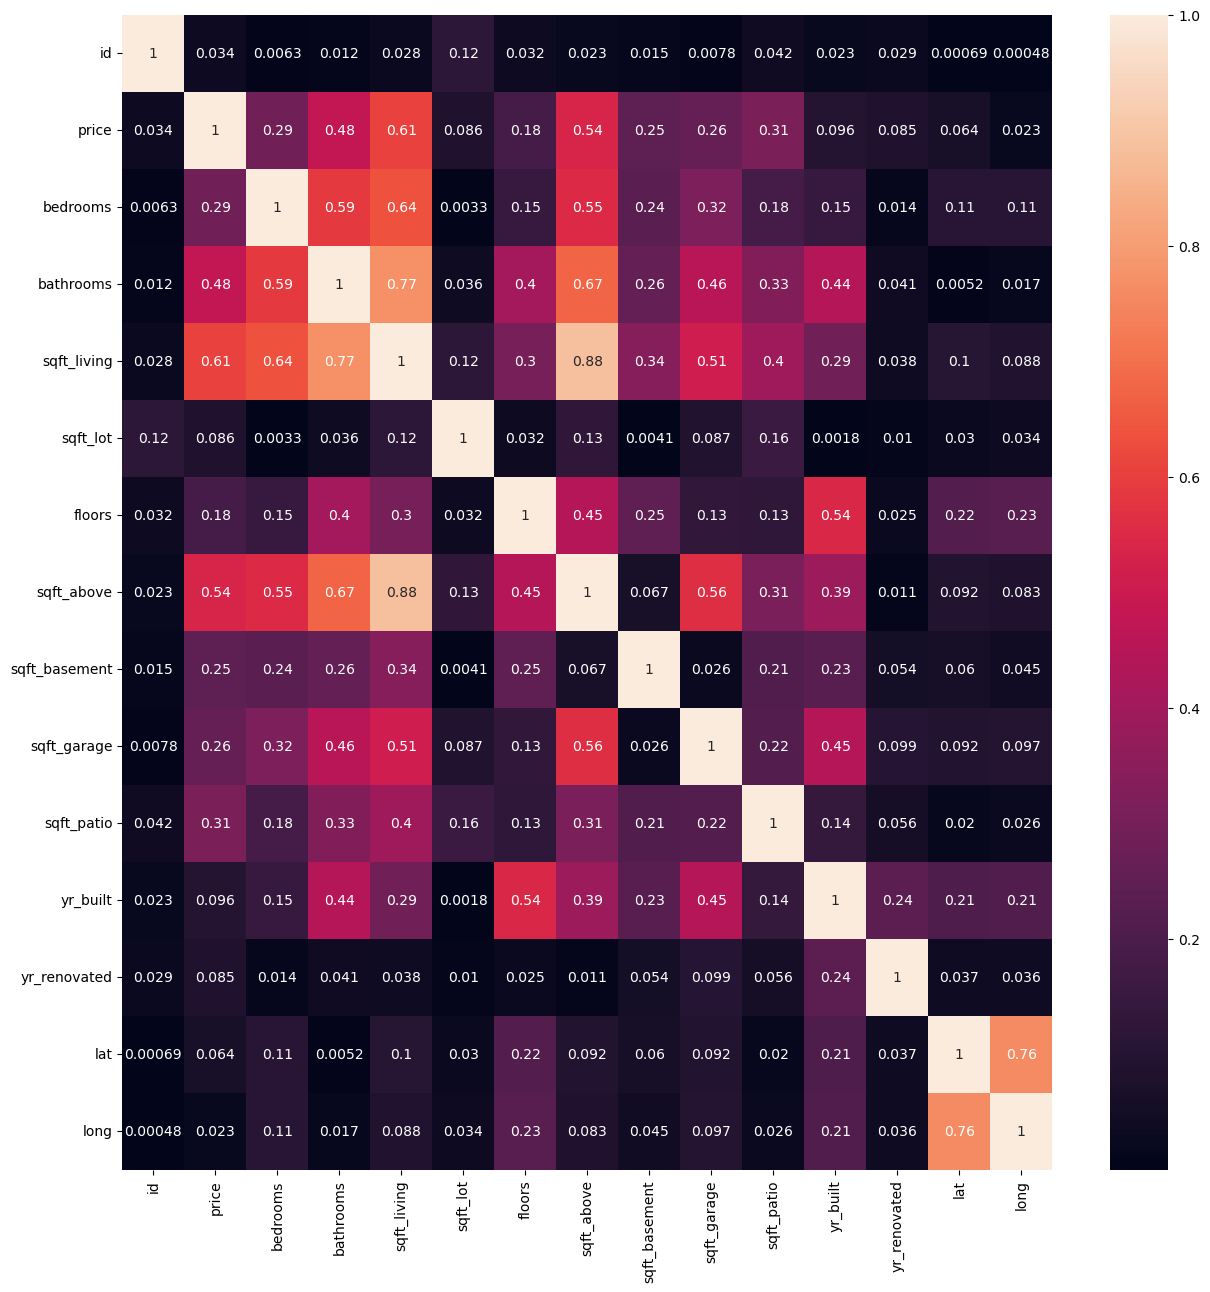

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(KCDF.corr().abs(), annot=True)
plt.show()

In [10]:
data1= KCDF.drop(columns= ['yr_renovated','sqft_above','sqft_basement',])

In [11]:
NewKCDF1= data1.dropna()
import numpy as np

In [12]:
NewKCDF1['address'].unique()

array(['2102 Southeast 21st Court, Renton, Washington 98055, United States',
       '11231 Greenwood Avenue North, Seattle, Washington 98133, United States',
       '8504 South 113th Street, Seattle, Washington 98178, United States',
       ...,
       '910 Martin Luther King Jr Way, Seattle, Washington 98122, United States',
       '17127 114th Avenue Southeast, Renton, Washington 98055, United States',
       '18615 7th Avenue South, Burien, Washington 98148, United States'],
      dtype=object)

In [13]:
 NewKCDF1['postal_code'] = NewKCDF1['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

NewKCDF1

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2465279451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['postal_code'] = NewKCDF1['address'].str.findall(r'([0-9]\d+)').apply(


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,7 Average,Gas,PUBLIC,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,7 Average,Oil,PUBLIC,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,7 Average,Gas,PUBLIC,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,9 Better,Gas,PUBLIC,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,7 Average,Electricity,PUBLIC,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,8 Good,Oil,PUBLIC,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,7 Average,Gas,PUBLIC,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,7 Average,Gas,PUBLIC,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,8 Good,Gas,PUBLIC,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [14]:
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98002':'Auburn'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98092':'Auburn'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98224':'Baring'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98004':'Bellevue'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98005':'Bellevue'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98006':'Bellevue'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98007':'Bellevue'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98008':'Bellevue'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98010':'Black Diamond'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98011':'Bothel'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98178':'Bryn Mawr-Skyway'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98148':'Burien'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98166':'Bellevue'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98014':'Carnation'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98077':'Cottage Lake'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98042':'Covington'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98198':'Des Moines'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98019':'Duvall'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98031':'East-Hill Meridian'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98022':'Enumclaw'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98058':'Fairwood'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98024':'Fall City'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98003':'Federal Way'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98023':'Federal Way'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98027':'Issaquah'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98029':'Issaquah'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98028':'Kenmore'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98032':'Kent'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98030':'Kent'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98033':'Kirkland'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98034':'Kirkland'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98001':'Lakeland North'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98038':'Maple Valley'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98039':'Medina'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98040':'Mercer Island'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98045':'North Bend'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98047':'Pacific'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98050':'Preston'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98030':'Kent'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98051':'Ravensdale'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98052':'Redmond'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98055':'Renton'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98056':'Renton'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98057':'Renton'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98059':'Renton'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98074':'Sammamish'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98075':'Sammamish'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98188':'Seatac'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98199':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98174':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98154':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98158':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98164':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98101':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98102':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98103':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98104':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98105':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98106':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98107':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98108':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98109':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98112':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98115':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98116':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98117':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98118':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98119':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98121':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98122':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98125':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98126':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98133':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98134':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98136':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98144':'Seattle'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98155':'Shoreline'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98177':'Shoreline'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98288':'Skykomish'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98065':'Snoqualmine'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98168':'Tukwila'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98053':'Union Hill-Novelty Hill'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98195':'University of Washington'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98070':'Vashon'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98146':'White Center'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98072':'Woodinville'})
NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98354':'Milton'})








#Changing the postal codes to their corresponding city name to figure out where which county would have the most options for our new family 





































/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/40750496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98002':'Auburn'})
/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/40750496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['postal_code'] = NewKCDF1['postal_code'].replace({'98092':'Auburn'})
/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/40750496.py:3: SettingWithCopyWarning: 
A 

In [15]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
Amazon_Lat=47.6062
Amazon_Long=122.3321

NewKCDF1[Amazon_Lat]= Amazon_Lat
NewKCDF1[Amazon_Long]= Amazon_Long
NewKCDF1['postal_code'].nunique()


/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/1602506163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1[Amazon_Lat]= Amazon_Lat
/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/1602506163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1[Amazon_Long]= Amazon_Long


365

In [17]:
NewKCDF1['Amazon_Dis_Lat'] = NewKCDF1[Amazon_Lat] - NewKCDF1['lat']
NewKCDF1['Amazon_Dis_Long']= NewKCDF1[Amazon_Long] + NewKCDF1['long']


/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2907918988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['Amazon_Dis_Lat'] = NewKCDF1[Amazon_Lat] - NewKCDF1['lat']
/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2907918988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['Amazon_Dis_Long']= NewKCDF1[Amazon_Long] + NewKCDF1['long']


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

In [19]:
NewKCDF1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,address,lat,long,postal_code,47.6062,122.3321,Amazon_Dis_Lat,Amazon_Dis_Long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,Renton,47.6062,122.3321,0.144225,0.14158
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,Seattle,47.6062,122.3321,-0.105325,-0.02381
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,Bryn Mawr-Skyway,47.6062,122.3321,0.104155,0.10690
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,Seattle,47.6062,122.3321,0.040090,0.04190
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,Issaquah,47.6062,122.3321,0.073730,0.26022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,Seattle,47.6062,122.3321,-0.058540,0.00270
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,Seattle,47.6062,122.3321,0.040590,-0.05641
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,Seattle,47.6062,122.3321,-0.004195,0.03625
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,Renton,47.6062,122.3321,0.156710,0.14302


In [20]:
NewKCDF1['grade_num'] = NewKCDF1['grade'].apply(lambda x: x.split(' ')[0])

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2491413290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['grade_num'] = NewKCDF1['grade'].apply(lambda x: x.split(' ')[0])


In [21]:
NewKCDF1['grade_num'].value_counts()

7     11693
8      9400
9      3804
6      2852
10     1369
11      406
5       385
12      122
4        46
13       24
3         9
2         1
Name: grade_num, dtype: int64

In [22]:
NewKCDF1['grade_num'] = NewKCDF1['grade_num'].astype('float')

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2949801817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['grade_num'] = NewKCDF1['grade_num'].astype('float')


In [23]:
NewKCDF1['grade_num']= NewKCDF1['grade_num'].sort_values()

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/553756543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['grade_num']= NewKCDF1['grade_num'].sort_values()


In [24]:
NewKCDF1['condition']

NewKCDF1['condition'] = NewKCDF1['condition'].astype('category')
NewKCDF1['condition']

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/3999917347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['condition'] = NewKCDF1['condition'].astype('category')


0           Good
1        Average
2        Average
3        Average
4        Average
          ...   
30150       Good
30151    Average
30152    Average
30153    Average
30154    Average
Name: condition, Length: 30111, dtype: category
Categories (5, object): ['Average', 'Fair', 'Good', 'Poor', 'Very Good']

In [25]:
NewKCDF1['condition_num'] = NewKCDF1['condition'].cat.codes

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/3031330539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['condition_num'] = NewKCDF1['condition'].cat.codes


In [26]:
NewKCDF1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,lat,long,postal_code,47.6062,122.3321,Amazon_Dis_Lat,Amazon_Dis_Long,grade_num,condition_num
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,Renton,47.6062,122.3321,0.144225,0.14158,7.0,2
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,Seattle,47.6062,122.3321,-0.105325,-0.02381,7.0,0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,Bryn Mawr-Skyway,47.6062,122.3321,0.104155,0.10690,7.0,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,Seattle,47.6062,122.3321,0.040090,0.04190,9.0,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,Issaquah,47.6062,122.3321,0.073730,0.26022,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,Seattle,47.6062,122.3321,-0.058540,0.00270,8.0,2
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,Seattle,47.6062,122.3321,0.040590,-0.05641,7.0,0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,Seattle,47.6062,122.3321,-0.004195,0.03625,7.0,0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,Renton,47.6062,122.3321,0.156710,0.14302,8.0,0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [29]:
lr = LinearRegression()
lr

NewKCDF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               30111 non-null  int64   
 1   date             30111 non-null  object  
 2   price            30111 non-null  float64 
 3   bedrooms         30111 non-null  int64   
 4   bathrooms        30111 non-null  float64 
 5   sqft_living      30111 non-null  int64   
 6   sqft_lot         30111 non-null  int64   
 7   floors           30111 non-null  float64 
 8   waterfront       30111 non-null  object  
 9   greenbelt        30111 non-null  object  
 10  nuisance         30111 non-null  object  
 11  view             30111 non-null  object  
 12  condition        30111 non-null  category
 13  grade            30111 non-null  object  
 14  heat_source      30111 non-null  object  
 15  sewer_system     30111 non-null  object  
 16  sqft_garage      30111 non-null  int64  

In [30]:
import statsmodels.api as sm
col_selector = ['id','grade_num',
                'sqft_living','long','lat','sqft_garage','sqft_patio','yr_built']
X = NewKCDF1[col_selector]
# standardize features
X_standard = X.apply(lambda x: (x - x.mean())/x.std() )
y = NewKCDF1['price']
y_standard = (y - y.mean())/y.std()



col_selector = ['id','grade_num',
                'sqft_living','long','lat','sqft_garage','sqft_patio','yr_built']
X =  NewKCDF1[col_selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

lr.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(NewKCDF1[['grade', 'condition', 'view']]), columns = NewKCDF1[['grade', 'condition', 'view']].columns)

In [32]:
NewKCDF1['address'][1]

'11231 Greenwood Avenue North, Seattle, Washington 98133, United States'

In [33]:
 def township(address):
    x= address.split(',')[1]
    
    return x
            


In [34]:
NewKCDF1['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30111, dtype: object

In [35]:
NewKCDF1['address'].nunique()

29519

In [36]:
NewKCDF1['bedrooms']= NewKCDF1['bedrooms'].astype(float)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/1360309982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['bedrooms']= NewKCDF1['bedrooms'].astype(float)


In [37]:
NewKCDF1['bed/bath']= NewKCDF1['bedrooms']*NewKCDF1['bathrooms']

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2803663038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['bed/bath']= NewKCDF1['bedrooms']*NewKCDF1['bathrooms']


In [38]:
NewKCDF1['address'].unique()


array(['2102 Southeast 21st Court, Renton, Washington 98055, United States',
       '11231 Greenwood Avenue North, Seattle, Washington 98133, United States',
       '8504 South 113th Street, Seattle, Washington 98178, United States',
       ...,
       '910 Martin Luther King Jr Way, Seattle, Washington 98122, United States',
       '17127 114th Avenue Southeast, Renton, Washington 98055, United States',
       '18615 7th Avenue South, Burien, Washington 98148, United States'],
      dtype=object)

In [39]:


NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Bothell':'North'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Cottage Lake':'North'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Kenmore':'North'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Lake Forest Park':'North'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Shoreline':'North'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Woodinville':'North'})

NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Auburn':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Burien':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Covington':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Des Moines':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Enumclaw':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Kent':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Maple Valley':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Federal Way':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Renton':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Tukwila':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'SeaTac':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Boulevard Park':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'White Center':'South'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Vashon Island':'South'})

NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Bellevue':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Carnation':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Duvall':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Issaquah':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Kirkland':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Medina':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Mercer Island':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'New Castle':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'North Bend':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Sammamish':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Skykomish':'East'})
NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Redmond':'East'})





NewKCDF1['newaddress']






/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2026877882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Bothell':'North'})
/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2026877882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['newaddress'] = NewKCDF1['address'].replace({'Cottage Lake':'North'})
/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/2026877882.py:3: SettingWithCopyWarning: 

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: newaddress, Length: 30111, dtype: object

In [40]:

NewKCDF1['newaddress']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: newaddress, Length: 30111, dtype: object

In [41]:
kc_zips = [98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98009,
 98010,
 98011,
 98013,
 98014,
 98015,
 98019,
 98022,
 98023,
 98024,
 98025,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98035,
 98038,
 98039,
 98040,
 98041,
 98042,
 98045,
 98047,
 98050,
 98051,
 98052,
 98053,
 98054,
 98055,
 98056,
 98057,
 98058,
 98059,
 98062,
 98063,
 98064,
 98065,
 98070,
 98071,
 98072,
 98073,
 98074,
 98075,
 98077,
 98083,
 98089,
 98092,
 98093,
 98101,
 98102,
 98103,
 98104,
 98105,
 98106,
 98107,
 98108,
 98109,
 98111,
 98112,
 98113,
 98114,
 98115,
 98116,
 98117,
 98118,
 98119,
 98121,
 98122,
 98124,
 98125,
 98126,
 98127,
 98129,
 98131,
 98132,
 98133,
 98134,
 98136,
 98138,
 98139,
 98141,
 98144,
 98145,
 98146,
 98148,
 98151,
 98154,
 98155,
 98158,
 98160,
 98161,
 98164,
 98165,
 98166,
 98168,
 98170,
 98171,
 98174,
 98175,
 98177,
 98178,
 98181,
 98184,
 98185,
 98188,
 98190,
 98191,
 98194,
 98195,
 98198,
 98199,
 98224,
 98288]

In [42]:
NewKCDF1['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30111, dtype: object

In [43]:
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [44]:
NewKCDF1['zip_code'] = NewKCDF1['address'].apply(lambda x: zip_code(x))


/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/1479791832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['zip_code'] = NewKCDF1['address'].apply(lambda x: zip_code(x))


In [45]:
NewKCDF1['zip_code'] = NewKCDF1['zip_code'].astype(int)


/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/3741475200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewKCDF1['zip_code'] = NewKCDF1['zip_code'].astype(int)


In [46]:
realkcdf = NewKCDF1[NewKCDF1['zip_code'].isin(kc_zips)]


In [47]:
realkcdf['zip_code'].nunique()

76

In [48]:
def geo_distance(coord_a, coord_b):
    #take two coordinates and calculate distances in miles
    
    return geodesic(coord_a, coord_b).miles

In [49]:
amzn_coord = (47.615722, -122.339494)


In [50]:
realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))


/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/475079207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))


In [51]:
realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)


/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/3757864555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)


In [52]:
data_near_amzn = realkcdf[realkcdf['distance_to_amazon'] <= 3]


In [53]:
data_near_amzn_filt = data_near_amzn[data_near_amzn['price'] < 10000000]


In [66]:
data_near_amzn_filt

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,122.3321,Amazon_Dis_Lat,Amazon_Dis_Long,grade_num,condition_num,bed/bath,newaddress,zip_code,location,distance_to_amazon
88,9828702665,4/2/2022,1061000.0,3.0,2.5,1490,959,2.0,NO,NO,...,122.3321,-0.012100,0.031050,8.0,0,7.5,"1826B 24th Ave, Seattle, Washington 98122, Uni...",98122,"(47.6183, -122.30105)",1.804614
96,2749600270,12/20/2021,850000.0,4.0,2.0,1740,5760,2.0,NO,NO,...,122.3321,-0.045350,-0.037080,7.0,1,8.0,"3433 9th Avenue West, Seattle, Washington 9811...",98119,"(47.65155, -122.36918)",2.836970
97,424049012,7/21/2021,725000.0,4.0,3.5,1630,1717,3.0,NO,NO,...,122.3321,0.011025,0.035835,8.0,0,14.0,"820 28th Avenue South, Seattle, Washington 981...",98144,"(47.595175, -122.296265)",2.468694
130,5317100105,2/16/2022,4424080.0,4.0,3.5,2940,7200,2.0,NO,NO,...,122.3321,-0.022870,0.051735,9.0,0,14.0,"1115 41st Avenue East, Seattle, Washington 981...",98112,"(47.62907, -122.280365)",2.911650
152,1930300726,9/27/2021,1475000.0,4.0,2.5,2350,3040,2.0,NO,NO,...,122.3321,-0.051050,-0.020770,8.0,0,10.0,"4119 Dayton Avenue North, Seattle, Washington ...",98103,"(47.65725, -122.35287)",2.936207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,6003501586,2/28/2022,1384375.0,4.0,3.0,2010,3200,1.5,NO,NO,...,122.3321,-0.013925,0.014945,8.0,2,12.0,"1122 East John Street, Seattle, Washington 981...",98102,"(47.620125, -122.317155)",1.086918
30120,5244801455,8/4/2021,1400000.0,3.0,2.0,2560,6441,2.0,NO,NO,...,122.3321,-0.038280,-0.022180,8.0,2,6.0,"153 Newell Street, Seattle, Washington 98109, ...",98109,"(47.64448, -122.35428)",2.103351
30123,7234600807,10/21/2021,969000.0,3.0,2.5,1660,1795,2.0,NO,NO,...,122.3321,-0.004300,0.022050,8.0,0,7.5,"914A 17th Ave, Seattle, Washington 98122, Unit...",98122,"(47.6105, -122.31005)",1.422021
30141,6362900076,3/15/2022,815000.0,3.0,2.0,1330,1191,2.0,NO,NO,...,122.3321,0.009730,0.032260,8.0,0,6.0,"724 25th Ave S, Seattle, Washington 98144, Uni...",98144,"(47.59647, -122.29984)",2.280688


In [54]:
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [55]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(realkcdf[['grade', 'condition', 'view']]), columns = realkcdf[['grade', 'condition', 'view']].columns)

In [56]:
new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/1652839498.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)


In [57]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [58]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

NameError: name 'nominal_cols' is not defined

In [59]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

NameError: name 'nominal_cols' is not defined

In [60]:



nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names_out())



NameError: name 'ohe_df' is not defined

In [61]:
nominal_df

NameError: name 'nominal_df' is not defined

In [62]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)

NameError: name 'nominal_df' is not defined

In [63]:
lr = LinearRegression()

In [64]:
col_select = cleandf.drop(columns = ['price', 'id', 'index', 'address','sqft_garage', 'location']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: name 'cleandf' is not defined

In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
X_train = X_train.drop(columns = 'date')

In [130]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_patio,yr_built,lat,long,postal_code,...,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288,nuisance_NO,nuisance_YES
3166,4.0,1.0,1260,4685,1.5,50,1924,47.531190,-122.381715,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3717,4.0,3.0,2150,6669,1.0,210,1918,47.677260,-122.299900,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15840,3.0,2.5,2030,10958,2.0,150,1983,47.725055,-122.109540,Redmond,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27117,4.0,1.0,1360,19510,1.5,330,1920,47.474260,-122.267520,Tukwila,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1492,4.0,3.5,2990,8281,2.0,460,1961,47.669415,-122.194585,Kirkland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17617,4.0,2.0,1950,7650,1.0,140,1966,47.601790,-122.143063,Bellevue,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25642,2.0,1.0,760,6650,1.0,0,1941,47.509030,-122.254490,Bryn Mawr-Skyway,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51,2.0,1.0,700,14750,1.5,0,1934,47.494710,-122.320140,Tukwila,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22630,4.0,3.0,1986,23954,1.0,130,1962,47.429170,-122.344680,Bellevue,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
X_train = X_train.drop(columns = ['postal_code', 'newaddress'])

In [83]:
lr.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['float', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [137]:
X_train = X_train.drop(columns = 47.6062)

In [142]:
X_train.columns.select_dtypes('float')

AttributeError: 'Index' object has no attribute 'select_dtypes'

In [143]:
categorical = X_train.columns[(X_train.dtypes.values != np.dtype('float64'))]


In [145]:
X_train = X_train[categorical]

In [146]:
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
lr.score(X_train,y_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [152]:
import streamlit as st

In [67]:
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [68]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(realkcdf[['grade', 'condition', 'view']]), columns = realkcdf[['grade', 'condition', 'view']].columns)

In [69]:
new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/1652839498.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)


In [70]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [71]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system','zip_code', 'nuisance']

In [74]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

/Users/justinlapidus/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names_out())

In [76]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_7385/3827932996.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)


In [77]:
cleandf

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,...,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199,zip_code_98224,zip_code_98288,nuisance_NO,nuisance_YES
0,0,7399300360,5/24/2022,675000.0,4.0,1.0,1180,7140,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,8910500230,12/13/2021,920000.0,5.0,2.5,2770,6703,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1180000275,9/29/2021,311000.0,6.0,2.0,2880,6156,1.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1604601802,12/14/2021,775000.0,3.0,3.0,2160,1400,2.0,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,8562780790,8/24/2021,592500.0,2.0,2.0,1120,758,2.0,550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,30150,7834800180,11/30/2021,1555000.0,5.0,2.0,1910,4000,1.5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29145,30151,194000695,6/16/2021,1313000.0,3.0,2.0,2020,5800,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29146,30152,7960100080,5/27/2022,800000.0,3.0,2.0,1620,3600,1.0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29147,30153,2781280080,2/24/2022,775000.0,3.0,2.5,2570,2889,2.0,480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
lr = LinearRegression()

In [80]:
col_select = cleandf.drop(columns = ['price', 'id', 'index', 'address','sqft_garage', 'location']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
lr.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['float', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.